# Importing important libraries

In [626]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import math

In [627]:
path="C:/Users/Lenovo/Downloads/ICG-Summer-Program-2021-DS-main/Assignment-1/data/train.csv"
df=pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


# Plots to inspect behaviour of data

<AxesSubplot:xlabel='Survived', ylabel='count'>

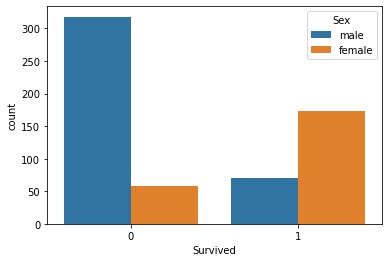

In [628]:
sns.countplot(x='Survived',data=df,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

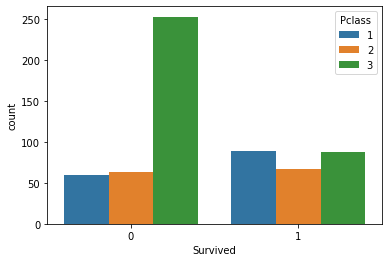

In [629]:
sns.countplot(x='Survived',data=df,hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

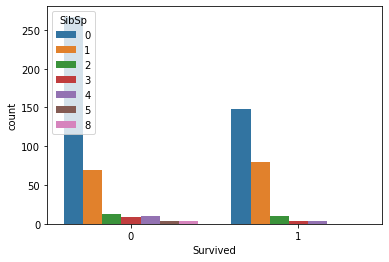

In [630]:
sns.countplot(x='Survived',data=df,hue='SibSp')

In [631]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            131
SibSp            0
Parch            0
Fare             0
dtype: int64


# Replacing nan values with median of each class

In [632]:
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


# Dropping irrelevant columns 

In [633]:
y=df.loc[:,'Survived']
x=df.drop('Survived',axis=1)
x.drop(['PassengerId'],inplace=True,axis=1)

In [634]:
x_train=x.to_numpy()

y_train=y.to_numpy()

# Encoding male and female to 1 and 0 respectively

In [635]:

for i in range(x_train.shape[0]):
    if x_train[i][1]=='male':
        x_train[i][1]=1
    else:
        x_train[i][1]=0

In [636]:
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))  ### adding a column of ones to multiply with theta_0 as intercept

In [637]:
def logistic_reg(X,theta):            ##Implementing the sigmoid function for prediction
    y_pred=np.matmul(X,theta)
    y_pred=y_pred.astype(float)
    y_pred=np.exp(-y_pred)
    y_pred=1/(1+y_pred)
    return y_pred

In [638]:
def compute_cost(X,y,theta):        ## implementing cost function
    m=y.shape[0]
    y_hat=logistic_reg(X,theta)
    cost=-np.sum(np.multiply(y,np.log(y_hat+1e-7))+np.multiply(1-y,np.log(1-y_hat+1e-7)))/m
    return cost

In [639]:
def gradient_descent(X,y,theta,iter,lr=0.01):
    
    m=y.shape[0]
    cost_history=[]
    for i in range(iter):
        theta=theta-lr*np.matmul(X.T,(logistic_reg(X,theta))-y)/m
        
        cost_history.append(compute_cost(X,y,theta))
    return cost_history,theta

In [640]:
theta=np.random.randn(x_train.shape[1])
cost,theta=gradient_descent(x_train,y_train,theta,2000,0.003)    ### training theta array

In [641]:
def predict(X,theta):             ## function to predict 1 if predicted value is >= 0.5 otherwise 0
    y_hat=logistic_reg(X,theta)
    y=np.ndarray(y_hat.shape[0])
    k=0
    for i in y_hat: 
        if i>=0.5: 
            y[k]=1 
        else: 
            y[k]=0
        k=k+1        
    return y

In [642]:
p='C:/Users/Lenovo/Downloads/ICG-Summer-Program-2021-DS-main/Assignment-1/data/test.csv'
dtest=pd.read_csv(p)
dtest.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.0,1,0,14.4542
1,622,1,1,male,42.0,1,0,52.5542
2,623,1,3,male,20.0,1,1,15.7417
3,624,0,3,male,21.0,0,0,7.8542
4,625,0,3,male,21.0,0,0,16.1000


In [643]:
dtest['Age'] = dtest['Age'].fillna(dtest.groupby('Pclass')['Age'].transform('median'))
print(dtest.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [644]:
y2=dtest.loc[:,'Survived']               ## dropping irrelevant columns
x2=dtest.drop('Survived',axis=1)
x2.drop(['PassengerId'],inplace=True,axis=1)

In [645]:
x_test=x2.to_numpy()

y_test=y2.to_numpy()

In [646]:
for i in range(x_test.shape[0]):        # encoding male to 1 and female to 0
    if x_test[i][1]=='male':
        x_test[i][1]=1
    else:
        x_test[i][1]=0

In [647]:
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))       ## adding a column of ones to multiply with theta_0 

In [648]:

def f1_score(y_test,y_pred):                ## function for f1 score
    True_pos=0
    True_neg=0
    False_pos=0
    False_neg=0
    for i in range(len(y_pred)):
        if y_test[i]==1 and y_pred[i]==1:
                True_pos=True_pos+1
        elif y_test[i]==0 and y_pred[i]==1:
                False_pos=False_pos+1
        elif y_test[i]==0 and y_pred[i]==0:
                True_neg=True_neg+1
        else:
                False_neg=False_neg+1
    precision=True_pos/(True_pos+False_pos)
    recall=True_pos/(True_pos+False_neg)
    f1=2*precision*recall/(precision+recall)
    return f1,precision,recall

In [649]:
y_pred_train=predict(x_train,theta)
cost1=compute_cost(x_train,y_train,theta)
print("Training set final cost ",cost1)

y_pred_test=predict(x_test,theta)
cost2=compute_cost(x_test,y_test,theta)
print("Testing set final cost ",cost2)

Training set final cost  0.6314324993585032
Testing set final cost  0.5917018688510021


# F1 scores

In [650]:
f1_train, _, _=f1_score(y_train,y_pred_train)
print("Training set f1 score ",f1_train)
f1_test,_,_ =f1_score(y_test,y_pred_test)
print("Training set f2 score ",f1_test)

Training set f1 score  0.45652173913043476
Training set f2 score  0.4768211920529801


# Accuracy

In [651]:
acc_train=np.sum(np.equal(y_pred_train,y_train))/len(y_pred_train)
print("Train set model accuracy ", acc_train)
acc_test=np.sum(np.equal(y_pred_test,y_test))/len(y_pred_test)
print("Test set model accuracy ", acc_test)

Train set model accuracy  0.6774193548387096
Test set model accuracy  0.7084870848708487
